Digit Recognizer (https://www.kaggle.com/c/digit-recognizer)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_digit_train = pd.read_csv('D:\\ML\\DigitRecognizer\\train.csv')
df_digit_test = pd.read_csv('D:\\ML\\DigitRecognizer\\test.csv')

In [4]:
df_digit_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_digit_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_digit_train.shape

(42000, 785)

In [7]:
training = np.array(df_digit_train,dtype='float32')
testing = np.array(df_digit_test,dtype='float32')

In [24]:
df_digit_test.shape

(28000, 784)

8.0

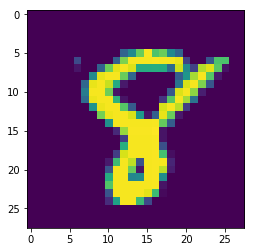

In [11]:
import random 
i = random.randint(1,42000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

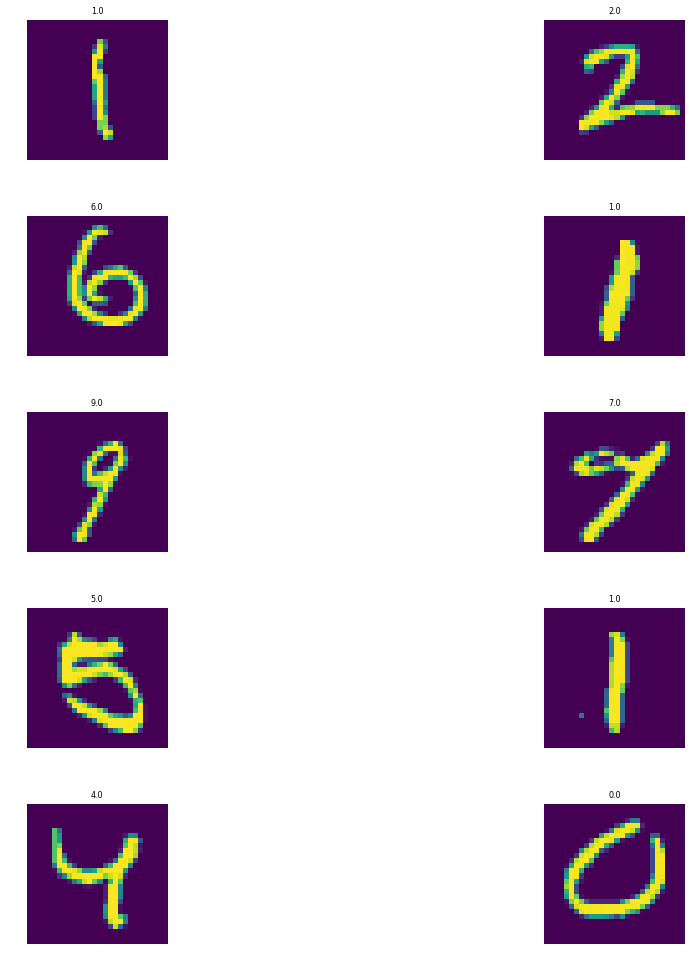

In [13]:
W_grid = 2
L_grid = 5
fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0,W_grid*L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0],fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

In [14]:
training.shape

(42000, 785)

In [15]:
training[0]

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 188., 255.,  94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [16]:
training[0].shape

(785,)

In [26]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,0:]/255
#y_test = testing[:,0]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size=0.2,random_state=12345)

In [27]:
X_test.shape

(28000, 784)

In [28]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

C:\Users\anooj\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [42]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim=32,activation='relu'))
cnn_model.add(Dense(output_dim=10,activation='sigmoid'))

C:\Users\anooj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
C:\Users\anooj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """
C:\Users\anooj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [43]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [44]:
epochs = 50
cnn_model.fit(X_train,y_train,batch_size=512,nb_epoch =epochs,verbose=1,validation_data=(X_validate,y_validate))

C:\Users\anooj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 42000 samples, validate on 8400 samples
Epoch 1/50
42000/42000 [==============================] - 17s 416us/step - loss: 0.7755 - acc: 0.8024 - val_loss: 0.3118 - val_acc: 0.9092
Epoch 2/50
42000/42000 [==============================] - 17s 414us/step - loss: 0.2447 - acc: 0.9285 - val_loss: 0.2161 - val_acc: 0.9349
Epoch 3/50
42000/42000 [==============================] - 17s 407us/step - loss: 0.1849 - acc: 0.9455 - val_loss: 0.1545 - val_acc: 0.9552
Epoch 4/50
42000/42000 [==============================] - 17s 409us/step - loss: 0.1372 - acc: 0.9618 - val_loss: 0.1248 - val_acc: 0.9650
Epoch 5/50
42000/42000 [==============================] - 17s 409us/step - loss: 0.1120 - acc: 0.9680 - val_loss: 0.1015 - val_acc: 0.9712
Epoch 6/50
42000/42000 [==============================] - 17s 396us/step - loss: 0.0925 - acc: 0.9738 - val_loss: 0.0917 - val_acc: 0.9721
Epoch 7/50
42000/42000 [==============================] - 16s 392us/step - loss: 0.0813 - acc: 0.9772 - val_loss: 0.0

Evaluating the model

In [45]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

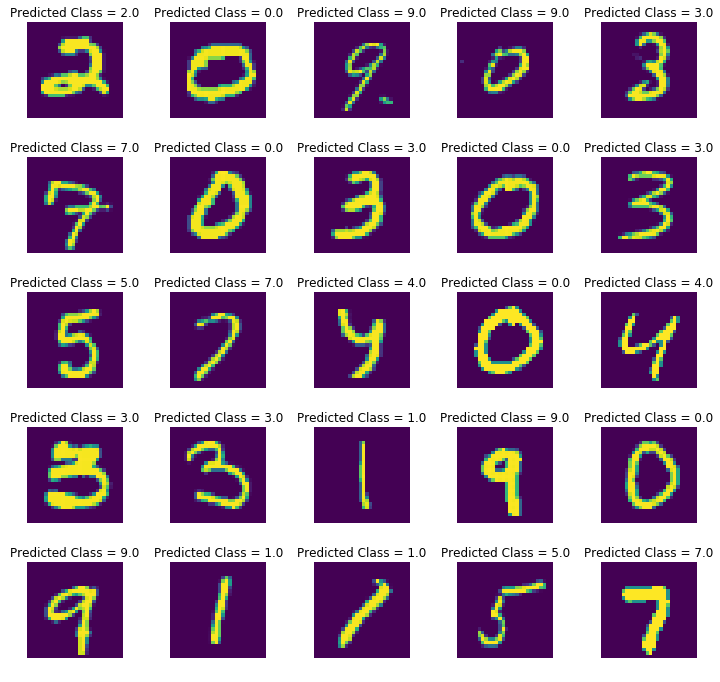

In [46]:
L = 5
W = 5
fig, axes = plt.subplots(L,W,figsize= (12,12))
axes= axes.ravel()
for i in np.arange(0,L* W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {:0.1f}".format(predicted_classes[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [48]:
sub = pd.read_csv('D:\\ML\\DigitRecognizer\\sample_submission.csv')
sub['Label'] = predicted_classes

sub.to_csv('D:\\ML\\DigitRecognizer\\sample_submission.csv',index = False)